# 09 데이터분석 프로젝트

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# pc에서 그림 설정
plt.rcParams.update({'figure.dpi' : '100'})             # 해상도, 기본값 72
plt.rcParams.update({'figure.figsize' : [4, 2.5]})  

In [3]:
# pc에서 한글 설정
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

In [4]:
# 데이터프레임의 소수점 이하 n(2)자리 출력 설정
pd.set_option('display.precision', 2)

In [5]:
# 그림 선명하게
%config InlineBackend.figure_format = 'retina'

In [6]:
!pip install pyreadstat

   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.4 MB 1.7 MB/s eta 0:00:02
   -- ------------------------------------- 0.2/2.4 MB 1.3 MB/s eta 0:00:02
   -- ------------------------------------- 0.2/2.4 MB 1.3 MB/s eta 0:00:02
   --- ------------------------------------ 0.2/2.4 MB 1.1 MB/s eta 0:00:02
   --- ------------------------------------ 0.2/2.4 MB 958.6 kB/s eta 0:00:03
   ---- ----------------------------------- 0.3/2.4 MB 871.5 kB/s eta 0:00:03
   ---- ----------------------------------- 0.3/2.4 MB 850.6 kB/s eta 0:00:03
   ---- ----------------------------------- 0.3/2.4 MB 737.3 kB/s eta 0:00:03
   ----- ---------------------------------- 0.3/2.4 MB 729.6 kB/s eta 0:00:03
   ----- ---------------------------------- 0.3/2.4 MB 729.6 kB/s eta 0:00:03
   ----- ---------------------------------- 0.3/2.4 MB 675.6 kB/s eta 0:00:04
   ----- ---

In [7]:
raw_welfare = pd.read_spss('data/Koweps_hpwc14_2019_beta2.sav')
raw_welfare

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,2.01e+04,0.0,NaN,0.29,0.29,1307.76,1307.76,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,3.01e+04,0.0,NaN,0.42,0.42,1882.57,1882.57,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,4.01e+04,0.0,NaN,0.27,0.27,1189.69,1192.91,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,6.01e+04,0.0,NaN,0.49,0.50,2219.63,2224.27,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,6.01e+04,0.0,NaN,1.02,1.02,4565.39,4565.39,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14413,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14414,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14415,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,208.0,NaN,0.0,NaN
14416,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,5.0,.,4.0,3.0,3.0,NaN,1200.0,NaN,0.0,NaN


In [8]:
raw_welfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


In [9]:
welfare = raw_welfare.copy()

In [10]:
welfare.shape

(14418, 830)

In [11]:
welfare = welfare.rename(columns = {'h14_g3'     : 'sex',            #  성별
                                    'h14_g4'     : 'birth',          #  태어난 연도
                                    'h14_g10'    : 'marriage_type',  #  혼인 상태
                                    'h14_g11'    : 'religion',       #  종교 
                                    'p1402_8aq1' : 'income',         #  월급 
                                    'h14_eco9'   : 'code_job',       #  직업 코드
                                    'h14_reg7'   : 'code_region'})   #  지역 코드
welfare['sex']

0        2.0
1        1.0
2        1.0
3        1.0
4        2.0
        ... 
14413    2.0
14414    2.0
14415    1.0
14416    2.0
14417    1.0
Name: sex, Length: 14418, dtype: float64

In [17]:
welfare.sex.dtypes

dtype('O')

In [16]:
welfare.sex.value_counts()

sex
female    7913
male      6505
Name: count, dtype: int64

In [15]:
welfare.sex.isna()

0        False
1        False
2        False
3        False
4        False
         ...  
14413    False
14414    False
14415    False
14416    False
14417    False
Name: sex, Length: 14418, dtype: bool

In [14]:
welfare.sex.isna().sum()

0

In [12]:
welfare["sex"] = np.where(welfare.sex == 1, 'male', 'female')
welfare["sex"].value_counts()

sex
female    7913
male      6505
Name: count, dtype: int64

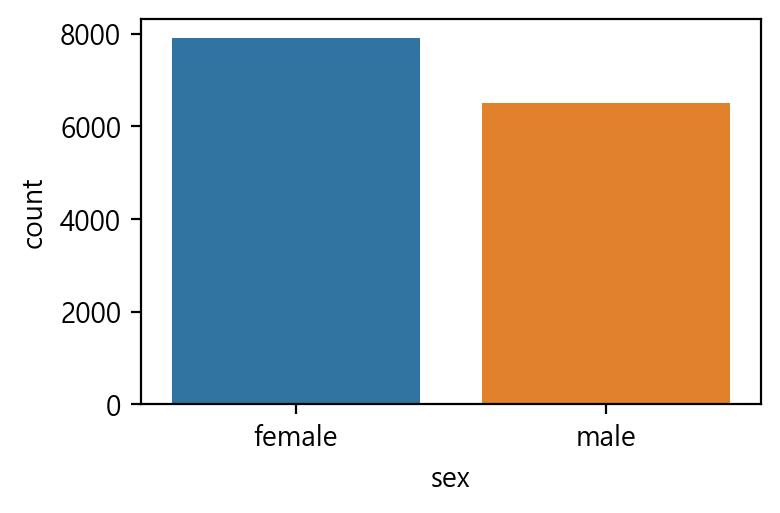

In [13]:
sns.countplot(welfare, x = 'sex', hue = 'sex');

## 11주차 수업

In [19]:
welfare['income'].dtypes  # 데이터 타입 출력

dtype('float64')

In [20]:
welfare['income'].describe()

count    4534.00
mean      268.46
std       198.02
min         0.00
25%       150.00
50%       220.00
75%       345.75
max      1892.00
Name: income, dtype: float64

<Axes: xlabel='income', ylabel='Count'>

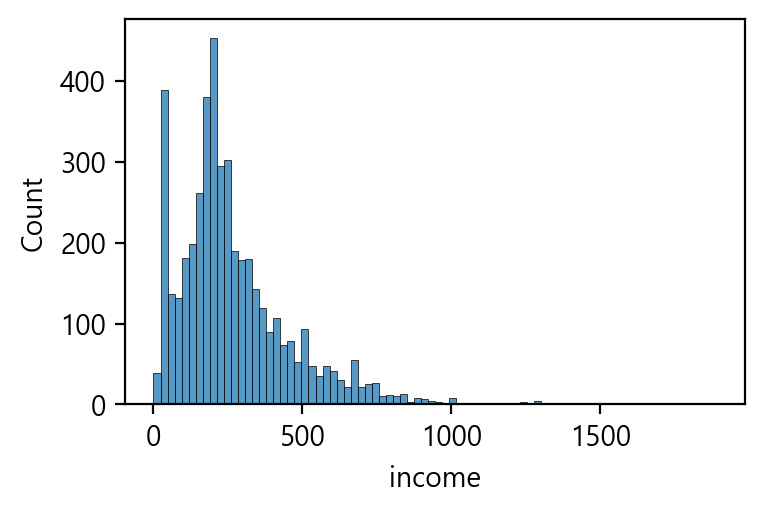

In [21]:
sns.histplot(data = welfare, x = 'income')

In [22]:
welfare['income'].isna().sum()  # 결측치 갯수 확인

9884

In [25]:
## 성별 월급 평균표 만들기

# income 결측치 제거
# sex별 분리
# income 평균 구하기
sex_income = welfare.dropna(subset = ['income']) \
                    .groupby('sex', as_index = False) \
                    .agg(mean_income = ('income', 'mean'))
sex_income

,sex,mean_income
0,female,186.29
1,male,349.04


In [26]:
sex_income = welfare.groupby('sex', as_index = False) \
                    .agg(mean_income = ('income', 'mean'))
sex_income

,sex,mean_income
0,female,186.29
1,male,349.04


<Axes: xlabel='sex', ylabel='mean_income'>

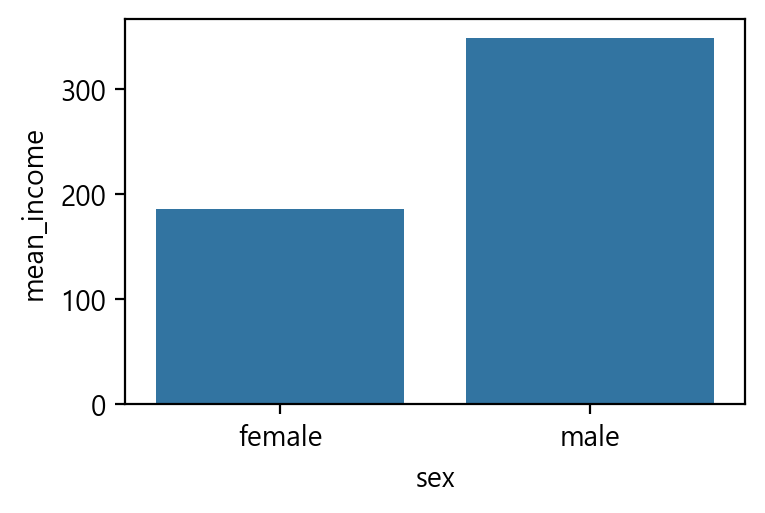

In [27]:
sns.barplot(data = sex_income, x = 'sex', y = 'mean_income') 
# 막대 그래프

## 나이와 월급의 관계

In [28]:
welfare['birth'].dtypes

dtype('float64')

In [29]:
welfare['birth'].describe()

count    14418.00
mean      1969.28
std         24.40
min       1907.00
25%       1948.00
50%       1968.00
75%       1990.00
max       2018.00
Name: birth, dtype: float64

<Axes: xlabel='birth', ylabel='Count'>

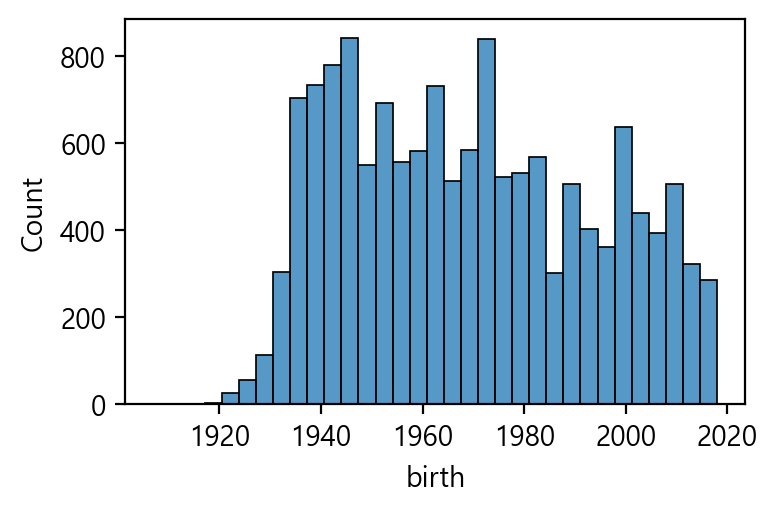

In [30]:
sns.histplot(data = welfare, x = 'birth')

In [31]:
welfare['birth'].isna().sum()

0

In [37]:
welfare = welfare.assign(age = 2019 - welfare['birth'])  # 나이 변수 만들기
welfare['age'].describe()

count    14418.00
mean        49.72
std         24.40
min          1.00
25%         29.00
50%         51.00
75%         71.00
max        112.00
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

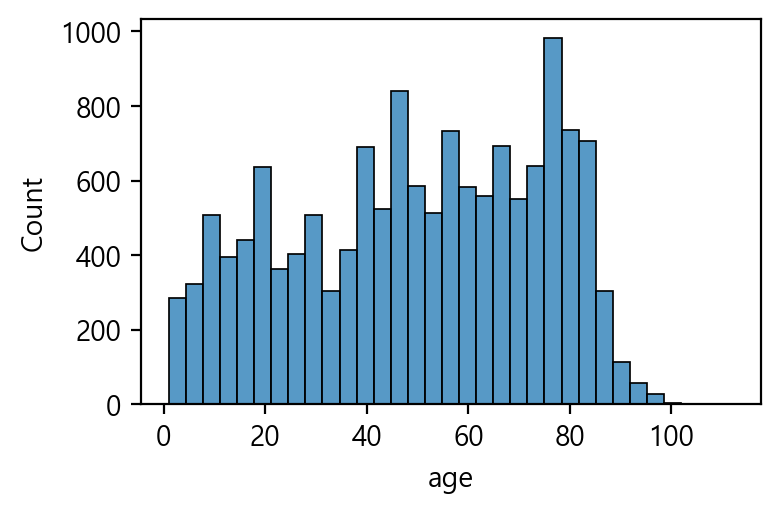

In [38]:
sns.histplot(data = welfare, x = 'age')

In [39]:
age_income = welfare.dropna(subset = ['income']) \
                    .groupby('age') \
                    .agg(mean_income = ('income', 'mean'))
age_income.head()

,mean_income
age,
18.0,162.00
19.0,121.33
20.0,136.40
21.0,123.67
22.0,179.68


<Axes: xlabel='age', ylabel='mean_income'>

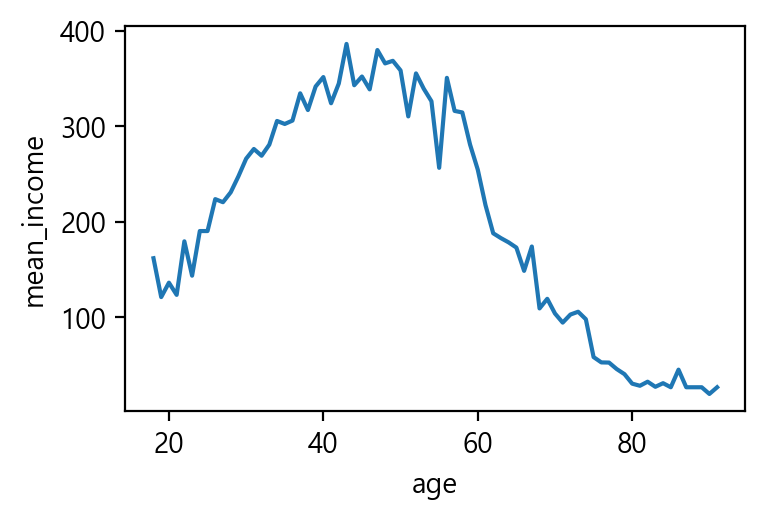

In [40]:
sns.lineplot(age_income, x = 'age', y = 'mean_income')

In [41]:
welfare = welfare.assign(ageg = np.where(welfare['age'] <  30, 'young',
                                np.where(welfare['age'] <= 59, 'middle', 'old')))

In [42]:
welfare['ageg'].value_counts()

ageg
old       5743
middle    5066
young     3609
Name: count, dtype: int64

<Axes: xlabel='ageg', ylabel='count'>

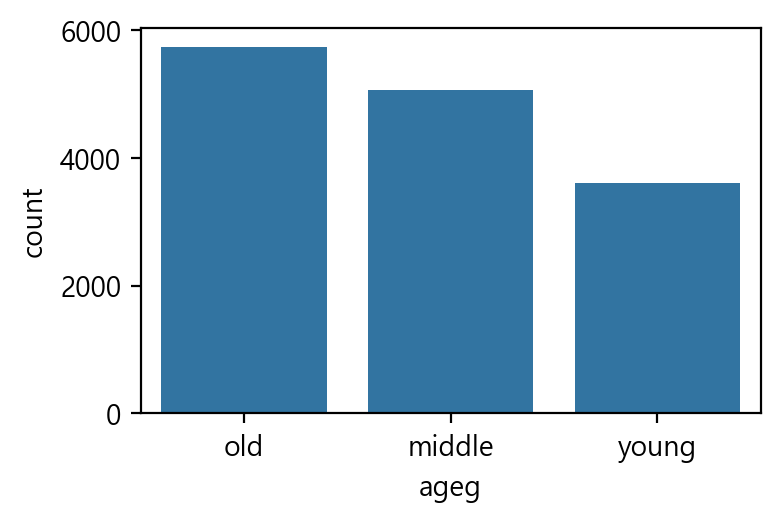

In [43]:
# 빈도 막대 그래프 만들기
sns.countplot(data = welfare, x = 'ageg') 

## 연령대에 따른 월급 차이 분석

In [45]:
ageg_income = welfare.dropna(subset = ['income']) \
                     .groupby('ageg', as_index = False) \
                     .agg(mean_income = ('income', 'mean'))
ageg_income

,ageg,mean_income
0,middle,329.74
1,old,126.26
2,young,202.60


<Axes: xlabel='ageg', ylabel='mean_income'>

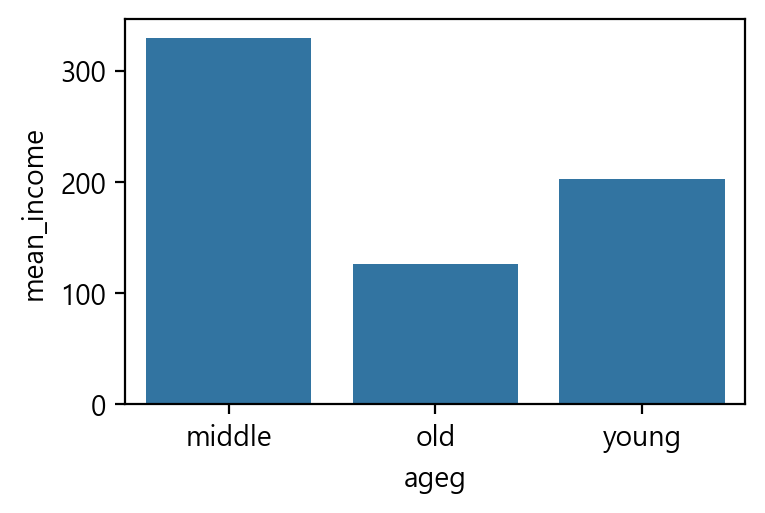

In [47]:
sns.barplot(ageg_income, x = 'ageg', y = 'mean_income')

<Axes: xlabel='ageg', ylabel='mean_income'>

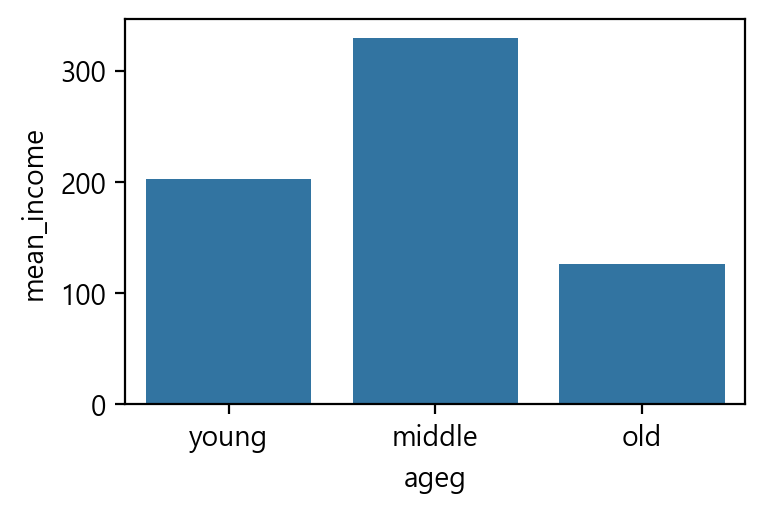

In [50]:
sns.barplot(data = ageg_income, x = 'ageg', y = 'mean_income', 
            order=['young', 'middle', 'old'])

## 연령대 및 성별 월급 차이

In [51]:
sex_income = welfare.dropna(subset = ['income']) \
                    .groupby(['ageg', 'sex'], as_index = False) \
                    .agg(mean_income = ('income', 'mean'))
sex_income

,ageg,sex,mean_income
0,middle,female,229.03
1,middle,male,410.60
2,old,female,84.32
3,old,male,183.91
4,young,female,193.76
5,young,male,215.95


<Axes: xlabel='ageg', ylabel='mean_income'>

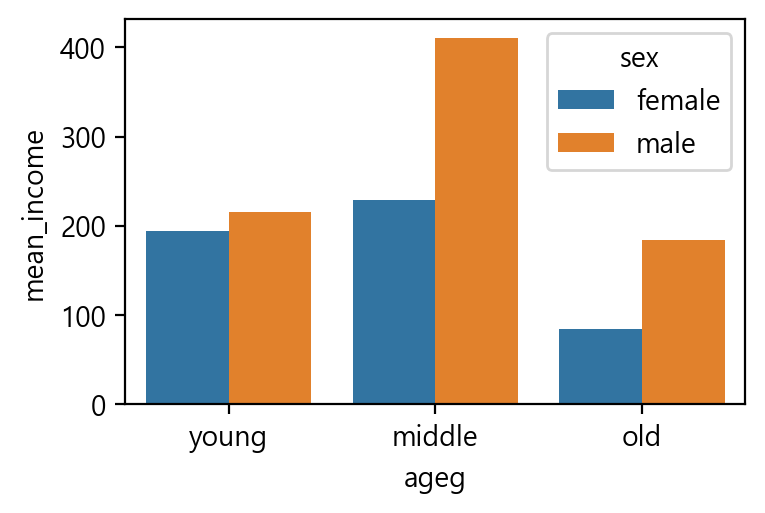

In [52]:
sns.barplot(sex_income, x = 'ageg', y = 'mean_income', hue = 'sex',
            order = ['young', 'middle', 'old'])

In [53]:
sex_age = welfare.dropna(subset = ['income']) \
                 .groupby(['age', 'sex'], as_index = False) \
                 .agg(mean_income = ('income', 'mean'))
sex_age.head()

,age,sex,mean_income
0,18.0,male,162.00
1,19.0,female,87.67
2,19.0,male,155.00
3,20.0,female,124.00
4,20.0,male,186.00


<Axes: xlabel='age', ylabel='mean_income'>

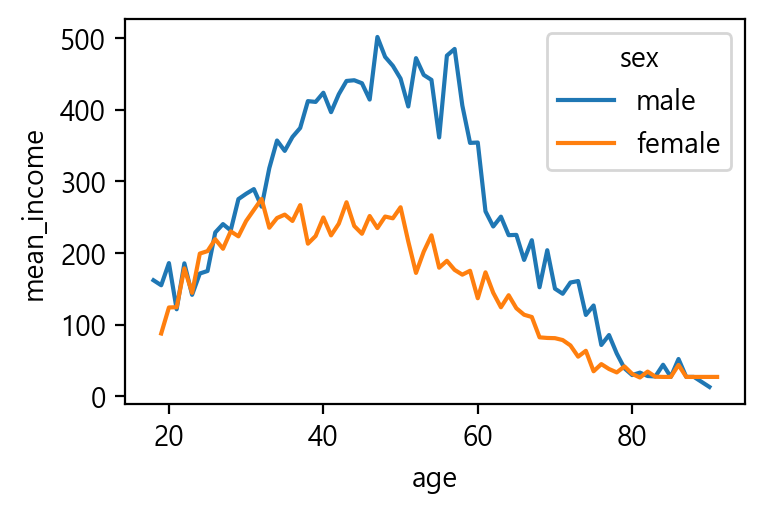

In [55]:
sns.lineplot(sex_age, x = 'age', y = 'mean_income', hue = 'sex')

## 직업별 월급 차이

In [56]:
welfare['code_job'].dtypes

dtype('float64')

In [57]:
welfare['code_job'].value_counts()

code_job
611.0    962
941.0    391
521.0    354
312.0    275
873.0    236
        ... 
112.0      2
784.0      2
423.0      1
861.0      1
872.0      1
Name: count, Length: 150, dtype: int64

In [59]:
list_job = pd.read_excel('data/Koweps_Codebook_2019.xlsx', sheet_name = '직종코드')
list_job.head()

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자


In [61]:
list_job.shape # 행,열 갯수

(156, 2)

In [64]:
# welfare에 list_job 결합하기
welfare = welfare.merge(list_job, how = 'left')
welfare[['job']].head()

,job
0,NaN
1,NaN
2,전기공
3,금속기계 부품 조립원
4,NaN


In [65]:
# code_job 결측치 제거하고 code_job, job 출력
welfare.dropna(subset = ['code_job'])[['code_job', 'job']].head()

,code_job,job
2,762.0,전기공
3,855.0,금속기계 부품 조립원
7,941.0,청소원 및 환경미화원
8,999.0,기타 서비스 관련 단순 종사자
14,312.0,경영 관련 사무원


In [66]:
job_income = welfare.dropna(subset = ['job', 'income']) \
                    .groupby('job', as_index = False)   \
                    .agg(mean_income = ('income', 'mean'))
job_income.head()

,job,mean_income
0,가사 및 육아 도우미,92.46
1,간호사,265.22
2,감정∙기술영업및중개관련종사자,391.00
3,건물 관리원 및 검표원,168.38
4,건설 및 광업 단순 종사자,261.98


In [67]:
# 상위 10개 추출
top10 = job_income.sort_values('mean_income', ascending = False).head(10)
top10

,job,mean_income
98,의료 진료 전문가,781.00
60,법률 전문가,776.33
140,행정 및 경영 지원 관리자,771.83
63,보험 및 금융 관리자,734.75
110,재활용 처리 및 소각로 조작원,688.00
131,컴퓨터 하드웨어 및 통신공학 전문가,679.44
24,기계∙로봇공학 기술자 및 시험원,669.17
6,건설∙전기 및 생산 관련 관리자,603.08
120,제관원 및 판금원,597.00
100,의회 의원∙고위 공무원 및 공공단체 임원,580.50


<Axes: xlabel='mean_income', ylabel='job'>

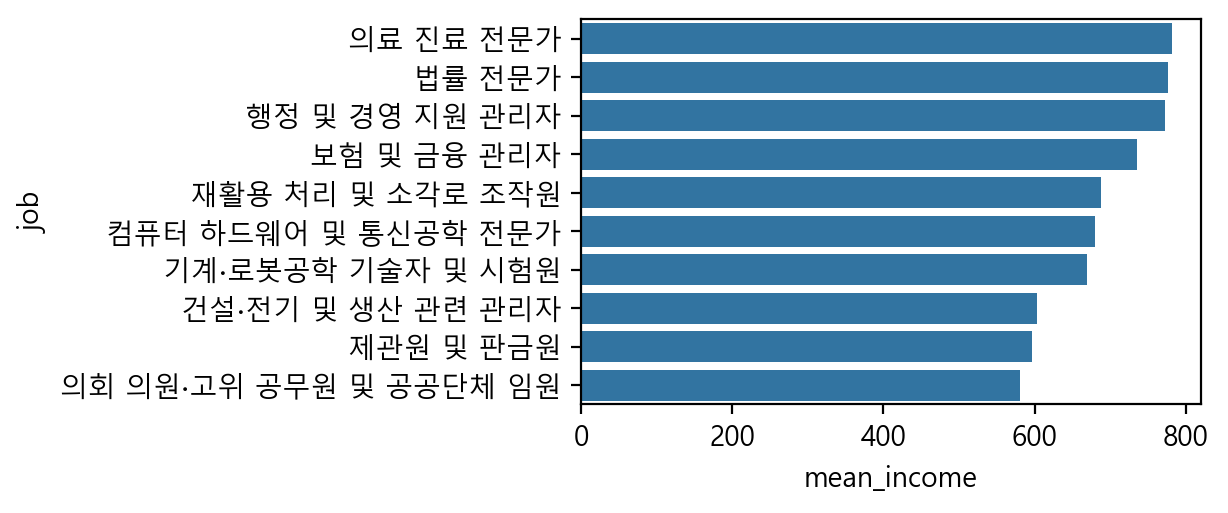

In [68]:
sns.barplot(top10, y = 'job', x = 'mean_income')

In [69]:
# 하위 10개 추출
bottom10 = job_income.sort_values('mean_income').head(10)
bottom10

,job,mean_income
33,기타 돌봄∙보건 및 개인 생활 서비스 종사자,73.96
34,기타 서비스 관련 단순 종사자,77.79
128,청소원 및 환경미화원,88.46
0,가사 및 육아 도우미,92.46
43,돌봄 및 보건 서비스 종사자,117.16
97,음식 관련 단순 종사자,118.19
39,농림∙어업 관련 단순 종사자,122.62
139,학예사∙사서 및 기록물 관리사,140.00
126,채굴 및 토목 관련 기능 종사자,140.00
135,판매 관련 단순 종사자,140.91


<Axes: xlabel='mean_income', ylabel='job'>

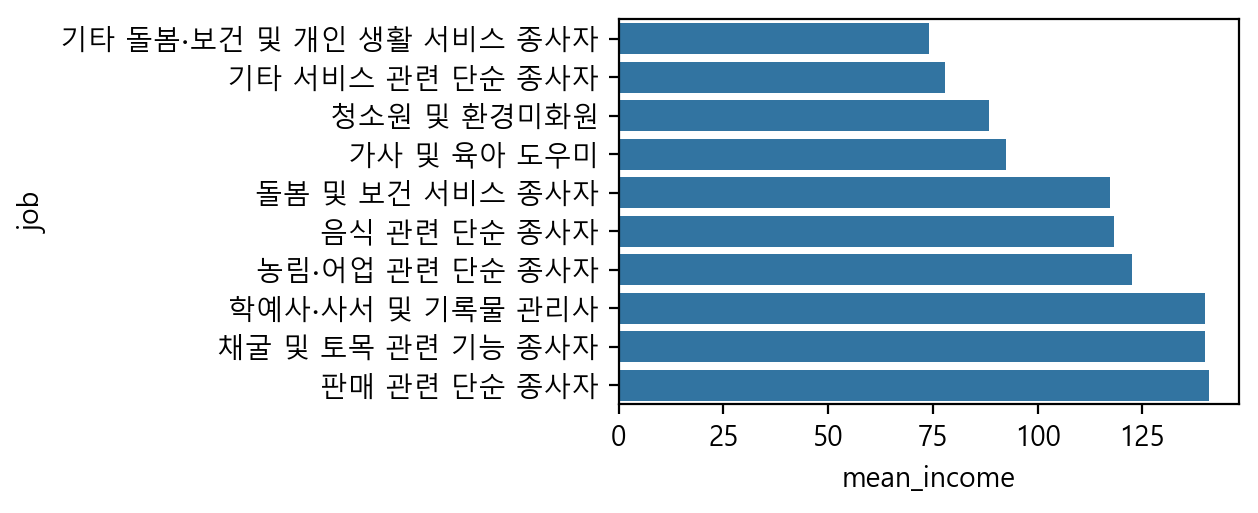

In [71]:
sns.barplot(bottom10, y = 'job', x = 'mean_income')

[(0.0, 800.0)]

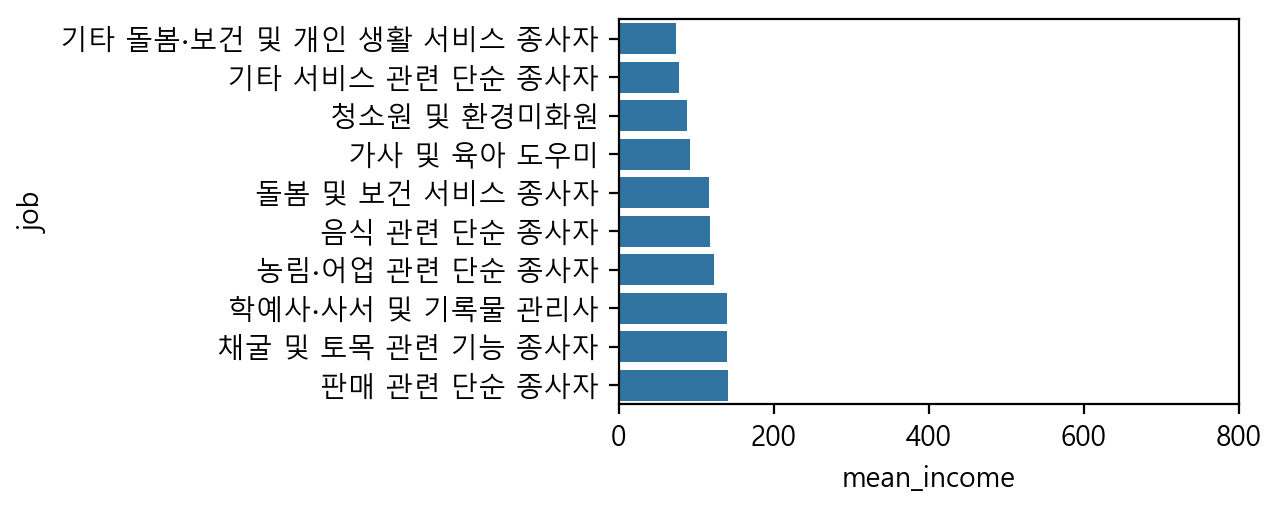

In [73]:
# 0~800
sns.barplot(data = bottom10, y = 'job', x = 'mean_income').set(xlim = [0, 800])

## 성별 직업 빈도

In [75]:
## 남성 직업 빈도
job_male = welfare.dropna(subset = ['job']) \
                  .query('sex == "male"') \
                  .groupby('job', as_index = False) \
                  .agg(n = ('job', 'count')) \
                  .sort_values('n', ascending = False) \
                  .head(10)
job_male

,job,n
107,작물 재배 종사자,486
104,자동차 운전원,230
11,경영 관련 사무원,216
46,매장 판매 종사자,142
89,영업 종사자,113
127,청소원 및 환경미화원,109
4,건설 및 광업 단순 종사자,96
120,제조 관련 단순 종사자,80
3,건물 관리원 및 검표원,79
141,행정 사무원,74


In [76]:
## 여성 직업 빈도
job_female = welfare.dropna(subset = ['job']) \
                    .query('sex == "female"') \
                    .groupby('job', as_index = False) \
                    .agg(n = ('job', 'count')) \
                    .sort_values('n', ascending = False) \
                    .head(10)
job_female

,job,n
83,작물 재배 종사자,476
91,청소원 및 환경미화원,282
33,매장 판매 종사자,212
106,회계 및 경리 사무원,163
31,돌봄 및 보건 서비스 종사자,155
87,제조 관련 단순 종사자,148
73,음식 관련 단순 종사자,126
58,식음료 서비스 종사자,117
88,조리사,114
24,기타 서비스 관련 단순 종사자,97


<Axes: xlabel='n', ylabel='job'>

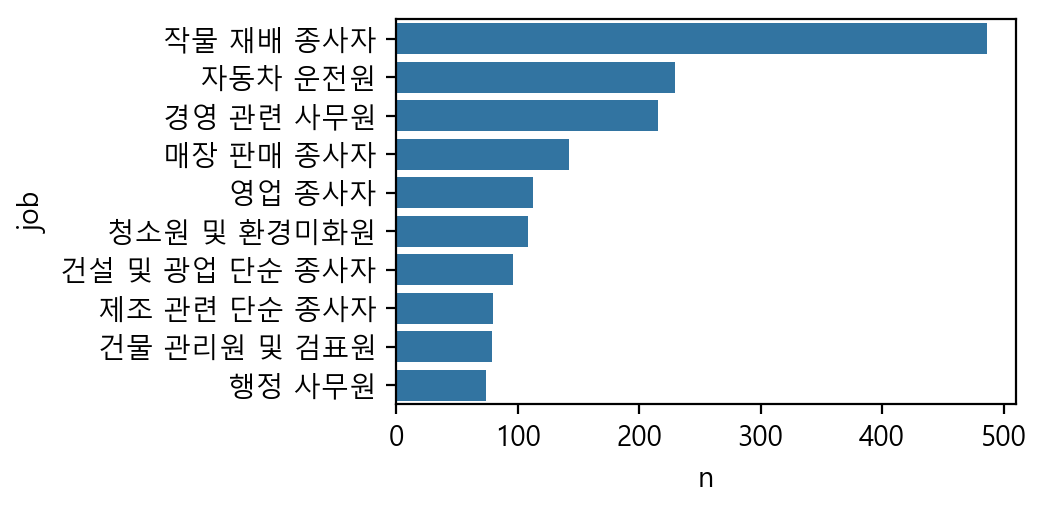

In [79]:
# 남성 직업 빈도
sns.barplot(job_male, x = 'n' , y = 'job')

<Axes: xlabel='n', ylabel='job'>

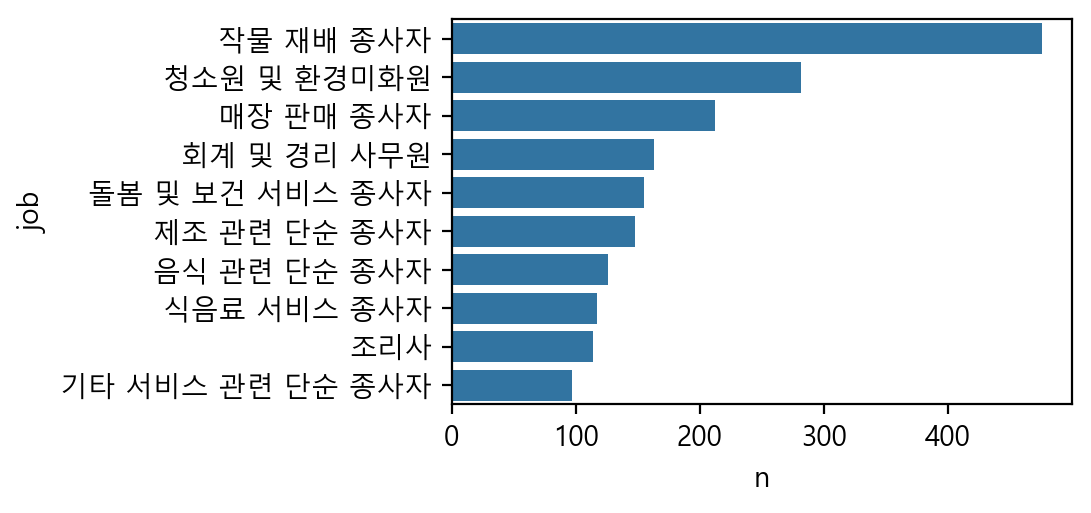

In [80]:
# 여성 직업 빈도
sns.barplot(job_female, x = 'n' , y = 'job')

## 종교 유무에 따른 이혼율

In [138]:
welfare['religion'].dtypes

dtype('O')

In [119]:
welfare['religion'].value_counts()

religion
no    14418
Name: count, dtype: int64

In [115]:
# 종교 유무 이름 부여
welfare['religion'] = np.where(welfare['religion'] == 1, 'yes', 'no')

welfare['religion'].value_counts()

religion
no    14418
Name: count, dtype: int64

<Axes: xlabel='religion', ylabel='count'>

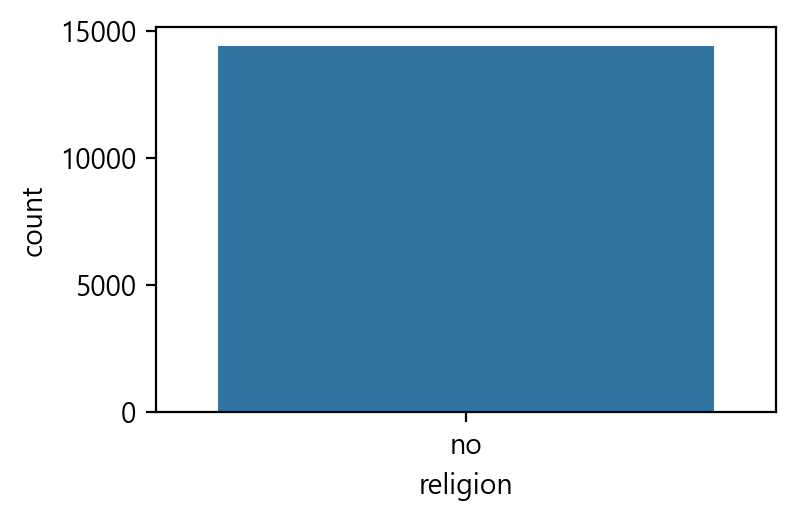

In [105]:
sns.countplot(data = welfare, x = 'religion')

## 혼인 상태 변수 검토 및 전처리하기

In [89]:
welfare['marriage_type'].dtypes

dtype('float64')

In [90]:
welfare['marriage_type'].value_counts()

marriage_type
1.0    7190
5.0    2357
0.0    2121
2.0    1954
3.0     689
4.0      78
6.0      29
Name: count, dtype: int64

In [95]:
welfare['marriage'] = np.where(welfare['marriage_type'] == 1, 'marriage',
                      np.where(welfare['marriage_type'] == 3, 'divorce', 'etc'))
welfare['marriage'].head()

0         etc
1         etc
2     divorce
3    marriage
4    marriage
Name: marriage, dtype: object

In [97]:
n_divorce = welfare.groupby('marriage', as_index = False) \
                   .agg(n = ('marriage', 'count'))
n_divorce

,marriage,n
0,divorce,689
1,etc,6539
2,marriage,7190


<Axes: xlabel='marriage', ylabel='n'>

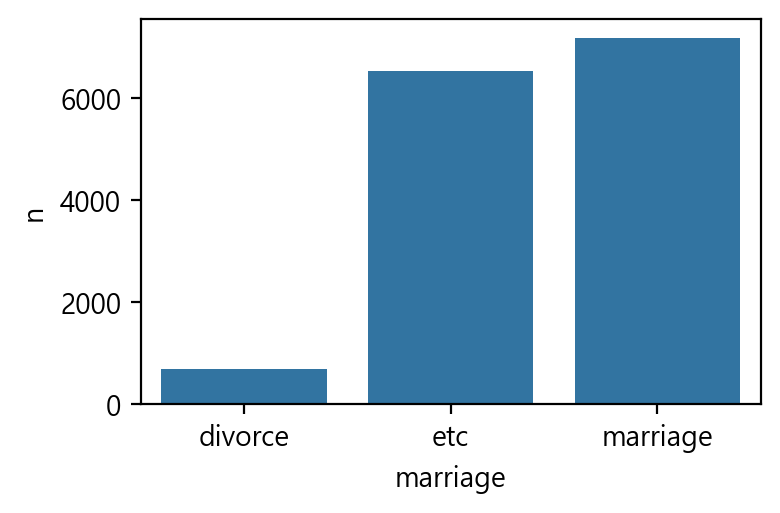

In [98]:
sns.barplot(n_divorce, x = 'marriage', y = 'n')

In [101]:
rel_div = welfare.query('marriage != "etc"') \
                 .groupby('religion', as_index = False)['marriage'] \
                 .value_counts()
rel_div

,religion,marriage,count
0,no,marriage,7190
1,no,divorce,689


In [102]:
rel_div = welfare.query('marriage != "etc"') \
                 .groupby('religion', as_index = False)['marriage'] \
                 .value_counts(normalize = True)
rel_div

,religion,marriage,proportion
0,no,marriage,0.91
1,no,divorce,0.09


In [103]:
rel_div = rel_div.query('marriage == "divorce"') \
                 .assign(proportion = rel_div['proportion'] * 100) \

rel_div

,religion,marriage,proportion
1,no,divorce,8.74


<Axes: xlabel='religion', ylabel='proportion'>

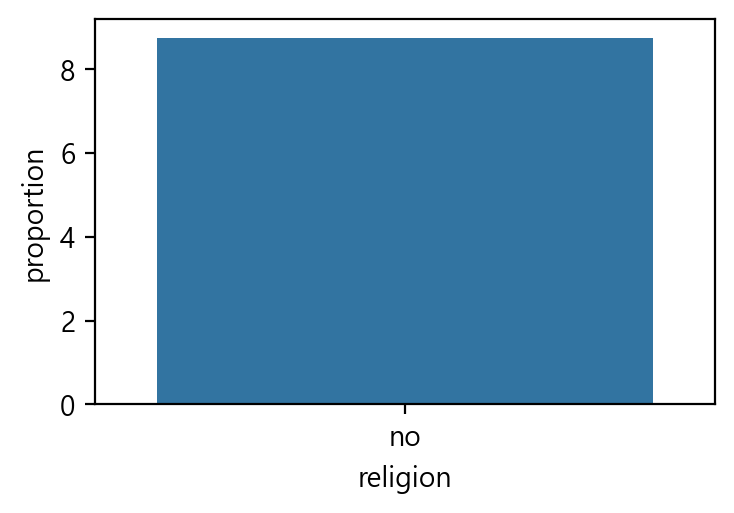

In [113]:
sns.barplot(rel_div, x = 'religion', y = 'proportion')

In [127]:
age_div = welfare.query('marriage != "etc"') \
                 .groupby('ageg', as_index = False)['marriage'] \
                 .value_counts(normalize = True)
age_div

,ageg,marriage,proportion
0,middle,marriage,0.91
1,middle,divorce,0.09
2,old,marriage,0.92
3,old,divorce,0.08
4,young,marriage,0.96
5,young,divorce,0.04


In [129]:
age_div = age_div.query('ageg != "young" & marriage != "divorce"') \
                 .assign(proportion = age_div['proportion'] * 100) 

age_div

,ageg,marriage,proportion
0,middle,marriage,90.75
2,old,marriage,91.70


<Axes: xlabel='ageg', ylabel='proportion'>

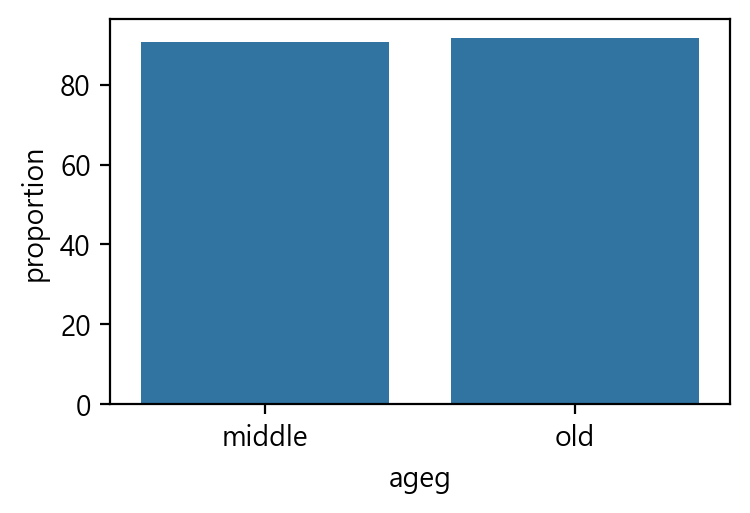

In [130]:
sns.barplot(age_div, x = 'ageg', y = 'proportion')

In [131]:
age_rel_div = welfare.query('marriage != "etc" & ageg != "young"') \
                     .groupby(['ageg', 'religion'], as_index = False) \
                     ['marriage'] \
                     .value_counts(normalize = True)
           
age_rel_div

,ageg,religion,marriage,proportion
0,middle,no,marriage,0.91
1,middle,no,divorce,0.09
2,old,no,marriage,0.92
3,old,no,divorce,0.08


In [139]:
age_rel_div = age_rel_div.query('marriage == "divorce"') \
                         .assign(proportion = age_rel_div['proportion'] * 100)
                         
age_rel_div

,ageg,religion,marriage,proportion
1,middle,no,divorce,9.25
3,old,no,divorce,8.30


<Axes: xlabel='ageg', ylabel='proportion'>

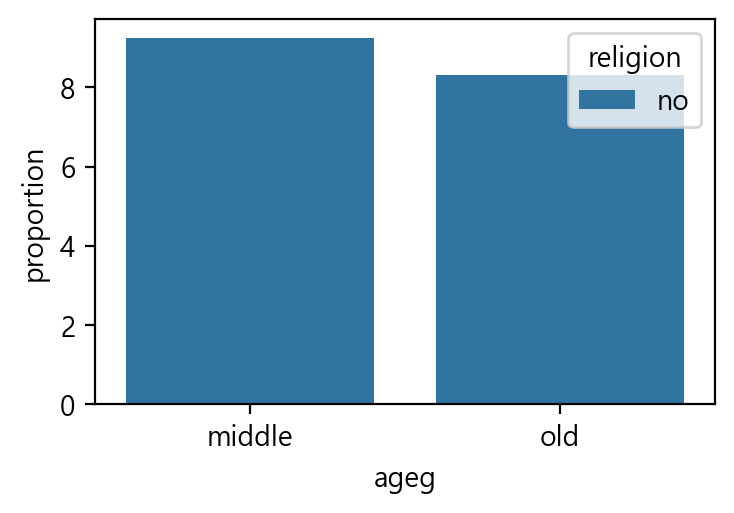

In [140]:
sns.barplot(data = age_rel_div, x = 'ageg', y = 'proportion', hue = 'religion')

## 지역별 연령대 비율

In [141]:
welfare['code_region'].dtypes

dtype('float64')

In [142]:
welfare['code_region'].value_counts()

code_region
2.0    3246
7.0    2466
3.0    2448
1.0    2002
4.0    1728
5.0    1391
6.0    1137
Name: count, dtype: int64

In [143]:
list_region = pd.DataFrame({'code_region' : [1, 2, 3, 4, 5, 6, 7],
                            'region'      : ['서울',
                                             '수도권(인천/경기)',
                                             '부산/경남/울산',
                                             '대구/경북',
                                             '대전/충남',
                                             '강원/충북',
                                             '광주/전남/전북/제주도']})
list_region

,code_region,region
0,1,서울
1,2,수도권(인천/경기)
2,3,부산/경남/울산
3,4,대구/경북
4,5,대전/충남
5,6,강원/충북
6,7,광주/전남/전북/제주도


In [144]:
welfare = welfare.merge(list_region, how = 'left', on = 'code_region')
welfare[['code_region', 'region']].head()

,code_region,region
0,1.0,서울
1,1.0,서울
2,1.0,서울
3,1.0,서울
4,1.0,서울


In [145]:
welfare[['code_region', 'region']].sample(10)

,code_region,region
10198,4.0,대구/경북
5619,2.0,수도권(인천/경기)
6580,2.0,수도권(인천/경기)
1733,1.0,서울
3042,4.0,대구/경북
5525,2.0,수도권(인천/경기)
14196,6.0,강원/충북
6797,2.0,수도권(인천/경기)
5969,2.0,수도권(인천/경기)
2067,3.0,부산/경남/울산


In [146]:
region_ageg = welfare.groupby('region', as_index = False)['ageg'] \
                     .value_counts(normalize = True)
region_ageg

,region,ageg,proportion
0,강원/충북,old,0.44
1,강원/충북,middle,0.32
2,강원/충북,young,0.24
3,광주/전남/전북/제주도,old,0.44
4,광주/전남/전북/제주도,middle,0.32
5,광주/전남/전북/제주도,young,0.24
6,대구/경북,old,0.49
7,대구/경북,middle,0.30
8,대구/경북,young,0.21
9,대전/충남,old,0.40


In [147]:
region_ageg = region_ageg.assign(proportion = region_ageg['proportion'] * 100) \
                         .round(1)
region_ageg

,region,ageg,proportion
0,강원/충북,old,44.2
1,강원/충북,middle,31.8
2,강원/충북,young,24.0
3,광주/전남/전북/제주도,old,43.6
4,광주/전남/전북/제주도,middle,32.5
5,광주/전남/전북/제주도,young,24.0
6,대구/경북,old,48.9
7,대구/경북,middle,30.4
8,대구/경북,young,20.7
9,대전/충남,old,40.1


<Axes: xlabel='proportion', ylabel='region'>

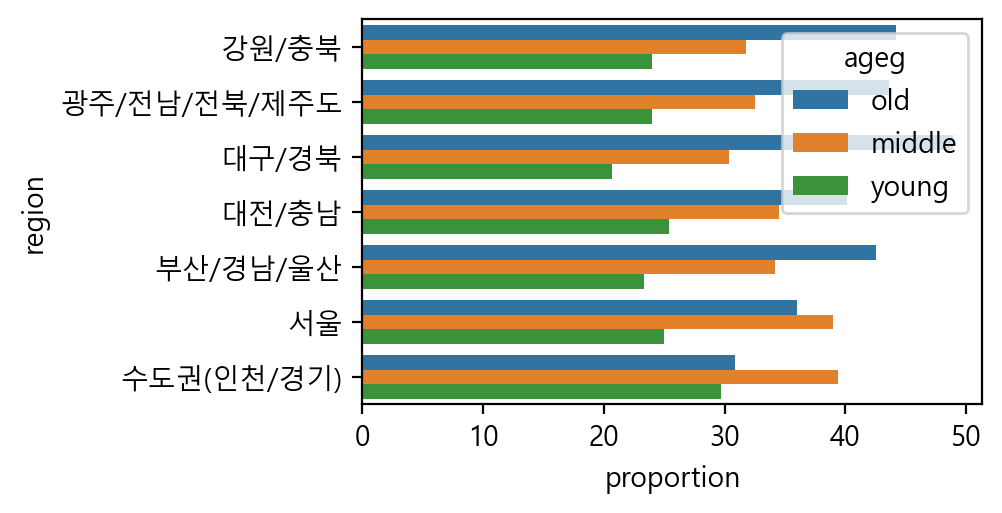

In [148]:
sns.barplot(data = region_ageg, y = 'region', x = 'proportion', hue = 'ageg')

## 기말 시험 예상

In [150]:
region_ageg[['region', 'ageg', 'proportion']]

,region,ageg,proportion
0,강원/충북,old,44.2
1,강원/충북,middle,31.8
2,강원/충북,young,24.0
3,광주/전남/전북/제주도,old,43.6
4,광주/전남/전북/제주도,middle,32.5
5,광주/전남/전북/제주도,young,24.0
6,대구/경북,old,48.9
7,대구/경북,middle,30.4
8,대구/경북,young,20.7
9,대전/충남,old,40.1


In [149]:
# 피벗
piv_df = region_ageg[['region', 'ageg', 'proportion']].pivot(index   = 'region',
                                                               columns = 'ageg',
                                                               values  = 'proportion')
piv_df

ageg,middle,old,young
region,,,
강원/충북,31.8,44.2,24.0
광주/전남/전북/제주도,32.5,43.6,24.0
대구/경북,30.4,48.9,20.7
대전/충남,34.5,40.1,25.4
부산/경남/울산,34.2,42.5,23.3
서울,39.0,36.0,25.0
수도권(인천/경기),39.4,30.9,29.7


In [153]:
piv_df.sort_values('old')

ageg,middle,old,young
region,,,
수도권(인천/경기),39.4,30.9,29.7
서울,39.0,36.0,25.0
대전/충남,34.5,40.1,25.4
부산/경남/울산,34.2,42.5,23.3
광주/전남/전북/제주도,32.5,43.6,24.0
강원/충북,31.8,44.2,24.0
대구/경북,30.4,48.9,20.7


In [155]:
reorder_df = piv_df.sort_values('old')[['young', 'middle', 'old']]
reorder_df

ageg,young,middle,old
region,,,
수도권(인천/경기),29.7,39.4,30.9
서울,25.0,39.0,36.0
대전/충남,25.4,34.5,40.1
부산/경남/울산,23.3,34.2,42.5
광주/전남/전북/제주도,24.0,32.5,43.6
강원/충북,24.0,31.8,44.2
대구/경북,20.7,30.4,48.9


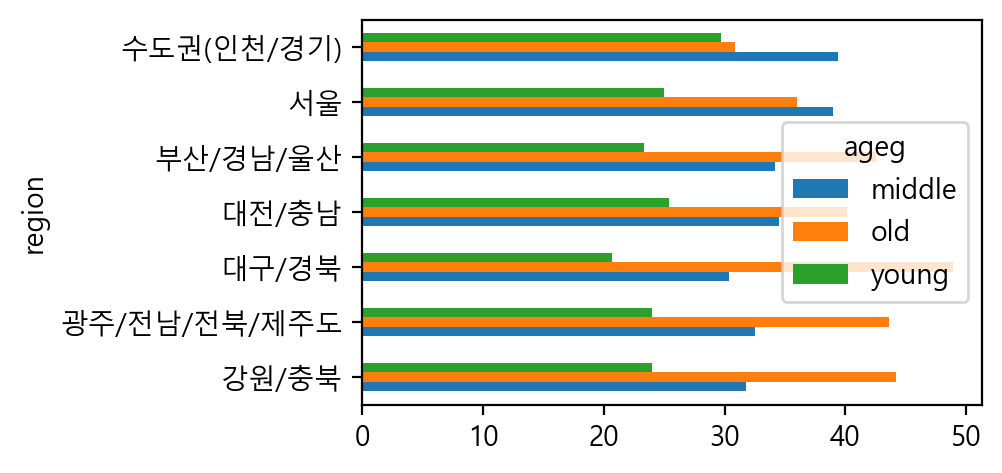

In [151]:
# 가로 막대 그래프
piv_df.plot.barh();

<Axes: ylabel='region'>

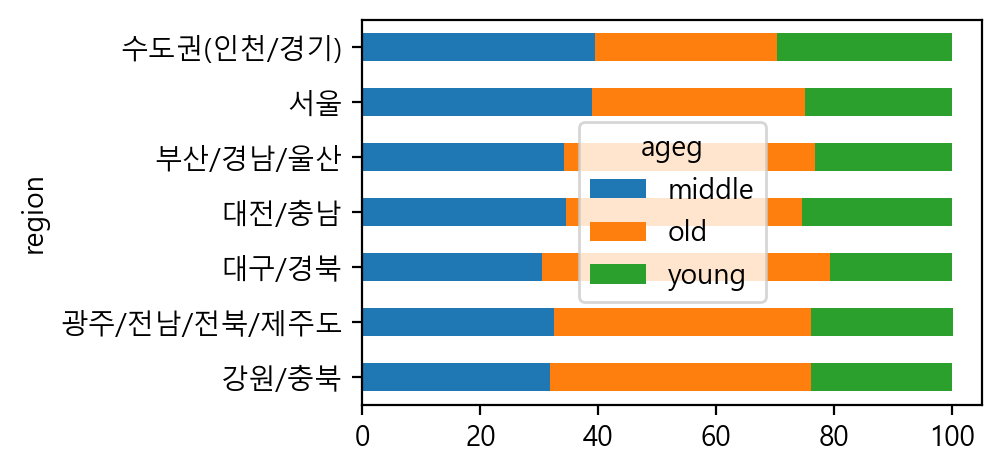

In [152]:
piv_df.plot.barh(stacked = True)

<Axes: ylabel='region'>

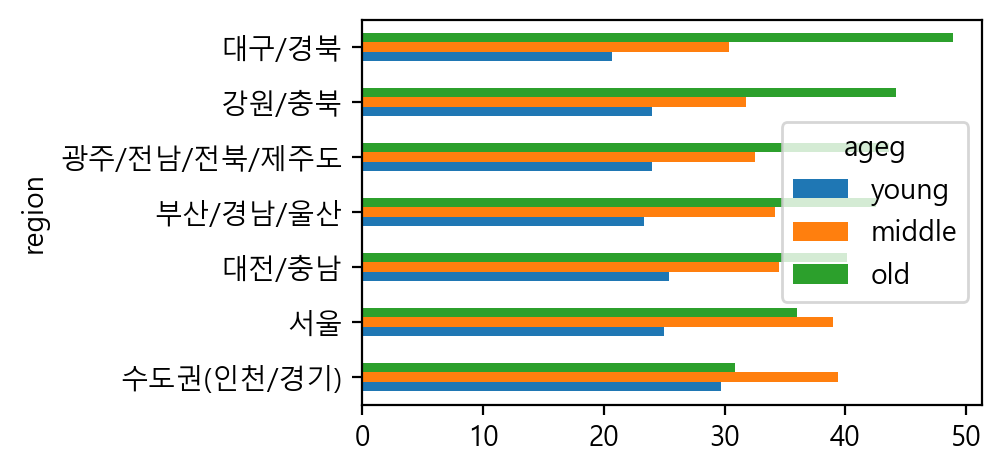

In [157]:
reorder_df.plot.barh()

<Axes: ylabel='region'>

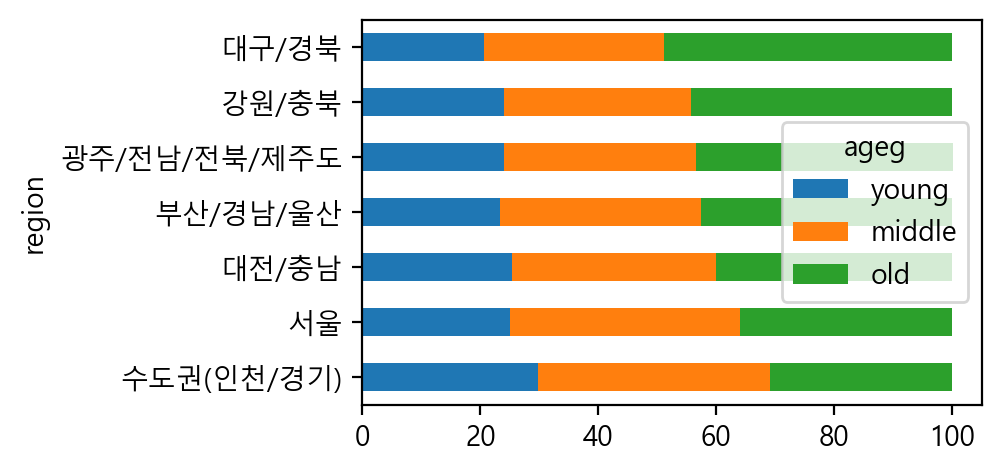

In [156]:
reorder_df.plot.barh(stacked = True)

## 종료